In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

population = []
#individu = [150,0.2,0.5,0.7,5,0.68,100]

model = [keras.models.load_model('/content/model_nbr.h5'),keras.models.load_model('/content/model_txVaccin.h5'),keras.models.load_model('/content/model_txQuar.h5'),keras.models.load_model('/content/model_txInfect.h5'),keras.models.load_model('/content/model_tmpsInfect.h5'),keras.models.load_model('/content/model_tmpsQuar.h5'),keras.models.load_model('/content/model_tmpsVoyage.h5')]

#creation de la première gen
def creationgen1(population):
    population = []
    for j in range(100):
        
        nbr = random.randint(10, 250)
        prcVaccin = round(random.uniform(0, 1),2)
        prcQuarantaine = round(random.uniform(0, 1-prcVaccin),2)
        txInfection = round(random.uniform(0, 1),2)
        tempsInfection = random.randint(2,20)
        tempsQuarantaine = random.randint(0,tempsInfection-1)
        tempsVoyage = random.randint(0,50)
        
        population.append((nbr,prcVaccin,prcQuarantaine,txInfection,tempsInfection,tempsQuarantaine,tempsVoyage))
    return population
    
#choix du top 20 + 5 chanceux
def Darwin(population):

  
  sum_population = []
  top_val = []

  #appliquer et sommer tout les models keras
  for j in population:
    a = sumModel(j)
    #for u in range(len(model)):
      #a = a + model[u].predict([j[u]])

    sum_population.append(abs(a))

  #trouver les indices des sommes les plus basses

  #sum_top = (sorted(sum_population))[:20]
  #res = sorted(range(len(sum_population)), key = lambda sub: sum_population[sub])[:20]
  sum_top,res = top(sum_population)

  #ajouter les chanceux
  luck = []
  for k in range(5):
    a = random.randint(0,99)
    if a not in res:
      b = random.randint(0,19)
      res[b] = a

    
  
  #def de top
  
  for k in res:
    top_val.append(population[k])


  #return top,res,top_val
  return top_val

#creation de nouvelle gen
def creationgenN(top):
  populationN = []
  for j in range(100):
    
    nbr = top[random.randint(0,19)][0]
    prcVaccin = top[random.randint(0,19)][1]
    prcQuarantaine = top[random.randint(0,19)][2]
    txInfection = top[random.randint(0,19)][3]
    tempsInfection = top[random.randint(0,19)][4]
    tempsQuarantaine = top[random.randint(0,19)][5]
    tempsVoyage = top[random.randint(0,19)][6]
 
    populationN.append((nbr,prcVaccin,prcQuarantaine,txInfection,tempsInfection,tempsQuarantaine,tempsVoyage))
  return populationN

#mutation sur une gen suivant un pourcentage du max de la valeur (provisoire)
def mutation(gen,tx,pui):
  #max des valeurs
  MAXnbr = 200
  MAXtxVaccin = 1
  MAXtxQuar = 1
  MAXtxInfection = 1
  MAXtmpsInfect = 10
  MAXtmpsQuar = 5
  MAXtmpsVoyage = 20
  
  genMut = []
  #mutation
  for j in range(len(gen)):
    chx = random.randint(1,100)
    
    if (chx < (tx*100)):
      #p = gen[j]
      
      
      if (j % 2) == 0:
        p= (abs(gen[j][0]+(MAXnbr*pui)),abs(gen[j][1]+(MAXtxVaccin*pui)),abs(gen[j][2]+(MAXtxQuar*pui)),abs(gen[j][3]+(MAXtxInfection*pui)),abs(gen[j][4]+(MAXtmpsInfect*pui)),abs(gen[j][5]+(MAXtmpsQuar*pui)),abs(gen[j][6]+(MAXtmpsVoyage*pui)))
      else:
        p= (abs(gen[j][0]+(MAXnbr*pui)),abs(gen[j][1]+(MAXtxVaccin*pui)),abs(gen[j][2]+(MAXtxQuar*pui)),abs(gen[j][3]-(MAXtxInfection*pui)),abs(gen[j][4]+(MAXtmpsInfect*pui)),abs(gen[j][5]+(MAXtmpsQuar*pui)),abs(gen[j][6]+(MAXtmpsVoyage*pui)))
      #print(p)
      
      
      genMut.append(p)
    else:
      genMut.append(gen[j])


  return genMut


def sumModel(u):
  a = 0
  for i in range(len(model)):
    a = a + model[i].predict([u[i]])
  return a


def top(sum_population):
  sum_top = (sorted(sum_population))[:20]
  res = sorted(range(len(sum_population)), key = lambda sub: sum_population[sub])[:20]
  return (sum_top,res)


In [ ]:
graph = []
def Iteration(population,N,tx,pui):
  if N == 0:
    return population
  else:
    dar = Darwin(population)
    mut = mutation(dar,0.1,0.1)
    genN = creationgenN(mut)
    top_,u = top(genN)
    err = 150 #la somme des min de chaque elem
    print("---il reste " + str(N) + " gen. avant la fin--- le meilleur de la gen.: " + str(top_[-1]) + " --- le score du meilleur: " + str(sumModel(top_[-1]) - err) + " ---")
    graph.append(int(sumModel(top_[-1]) - err))
    return (Iteration(genN,(N-1),tx,pui))
  

In [ ]:
ekip = Iteration(creationgen1([]),20,0.2,0.05)
#ekip = Iteration(ekip,10,0.2,0.1)
print (ekip)

---il reste 20 gen. avant la fin--- le meilleur de la gen.: (71, 0.05, 0.41, 0.28, 10, 0, 32) --- le score du meilleur: [[499.79242]] ---
---il reste 19 gen. avant la fin--- le meilleur de la gen.: (64, 0.74, 0.07, 0.09, 6, 0, 26) --- le score du meilleur: [[308.3142]] ---
---il reste 18 gen. avant la fin--- le meilleur de la gen.: (58, 0.94, 0.12000000000000001, 0.13, 2, 1.5, 22) --- le score du meilleur: [[225.9071]] ---
---il reste 17 gen. avant la fin--- le meilleur de la gen.: (58, 0.75, 0.62, 0.2, 2, 0, 13) --- le score du meilleur: [[92.87508]] ---
---il reste 16 gen. avant la fin--- le meilleur de la gen.: (58, 0.74, 0.6799999999999999, 0.41, 2, 0, 5) --- le score du meilleur: [[104.20035]] ---
---il reste 15 gen. avant la fin--- le meilleur de la gen.: (58, 0.84, 0.72, 0.2, 2, 0.5, 13) --- le score du meilleur: [[76.97594]] ---
---il reste 14 gen. avant la fin--- le meilleur de la gen.: (58, 0.74, 0.7799999999999999, 0.2, 2, 0, 13) --- le score du meilleur: [[57.904816]] ---
-

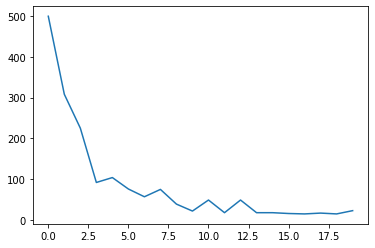

In [ ]:
import matplotlib.pyplot as plt
index = []
for j in range(20):
  index.append(j)
plt.plot(index,graph[25:])